In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Downloads/BankTransactions.csv')
df

,CustAccountBalance,TransactionTime,TransactionAmount (INR),CustomerAge,CustGender_M,LogBalance,LogTransactionAmount
0,17819.05,143207,25.0,22.0,0,9.788080,3.258097
1,2270.69,141858,27999.0,59.0,1,7.728279,10.239960
2,17874.44,142712,459.0,20.0,0,9.791183,6.131226
3,866503.21,142714,2060.0,43.0,0,13.672222,7.630947
4,6714.43,181156,1762.5,28.0,0,8.812163,7.475056
...,...,...,...,...,...,...,...
1048449,7635.19,184824,799.0,26.0,1,8.940654,6.684612
1048450,27311.42,183734,460.0,24.0,1,10.215097,6.133398
1048451,221757.06,183313,770.0,27.0,1,12.309342,6.647688
1048452,10117.87,184706,1000.0,38.0,1,9.222157,6.908755


In [2]:
df.drop(columns=['CustAccountBalance', 'TransactionAmount (INR)'], inplace=True)
df['TransactionTime'] = df['TransactionTime'].astype(int)

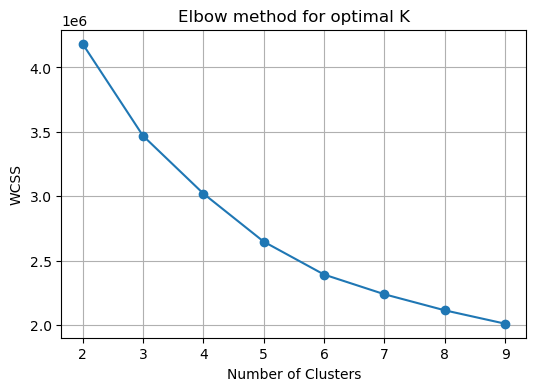

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x = df
x_scaled = StandardScaler().fit_transform(x)

inertia = []
Ks = range(2, 10)

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=12).fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(list(Ks), inertia, marker='o')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method for optimal K')
plt.show()

Silhouette Score 2: 0.6076
Silhouette Score 3: 0.6070
Silhouette Score 4: 0.5878
Silhouette Score 5: 0.5626
Silhouette Score 6: 0.5615
Silhouette Score 7: 0.5689
Silhouette Score 8: 0.5631
Silhouette Score 9: 0.5460


Text(0.5, 1.0, 'Silhouette Scores for different Ks')

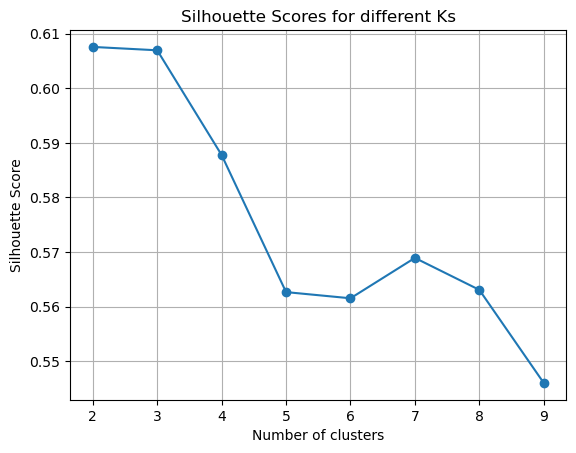

In [6]:
from sklearn.metrics import silhouette_score

x_sample = x.sample(10000, random_state=12)
sil_sc = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=12).fit(x_sample)
    labels = kmeans.labels_
    scores = silhouette_score(x_sample, labels)
    sil_sc.append(scores)
    print(f'Silhouette Score {k}: {scores:.4f}')

plt.plot(list(Ks), sil_sc, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.title('Silhouette Scores for different Ks')

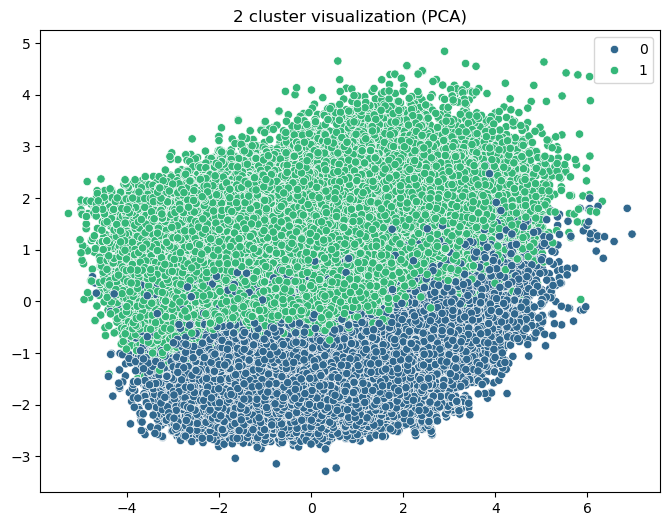

cluster_2                         0              1
TransactionTime       159672.808927  156139.136406
CustomerAge               30.476590      31.074685
CustGender_M               0.000000       1.000000
LogBalance                 9.695548       9.349586
LogTransactionAmount       6.216792       5.991401
cluster                    0.036263       1.512819
cluster_3                  0.036263       1.512819


In [21]:
from sklearn.decomposition import PCA
import seaborn as sns

labels = KMeans(n_clusters=2, random_state=12).fit_predict(x_scaled)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x= x_pca[:, 0], y= x_pca[:, 1], hue=labels, palette='viridis')
plt.title('2 cluster visualization (PCA)')
plt.show()

x['cluster_2'] = labels
summary = x.groupby('cluster_2').mean()
print(summary.T)

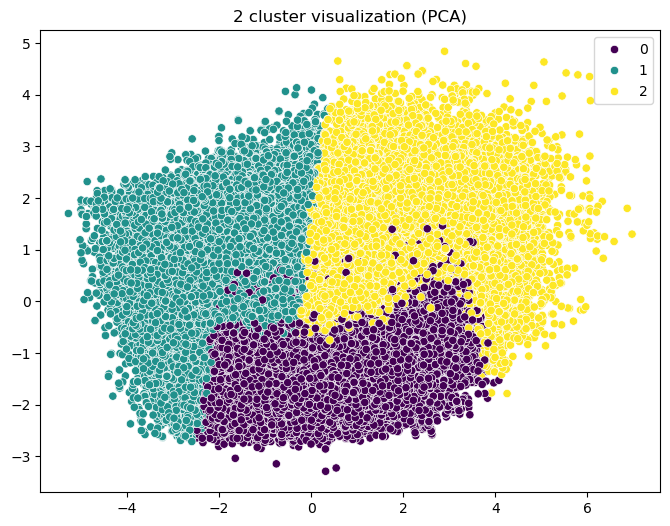

cluster_3                         0              1              2
TransactionTime       160408.513863  143955.376871  167353.492685
CustomerAge               30.236035      27.148132      34.986317
CustGender_M               0.000000       0.986572       0.993505
LogBalance                 9.782790       7.890213      10.691958
LogTransactionAmount       6.253303       4.963419       6.953904
cluster                    0.000000       1.000000       2.000000
cluster_2                  0.000000       0.986572       0.993505


In [22]:
labels = KMeans(n_clusters=3, random_state=12).fit_predict(x_scaled)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x= x_pca[:, 0], y= x_pca[:, 1], hue=labels, palette='viridis')
plt.title('2 cluster visualization (PCA)')
plt.show()

x['cluster_3'] = labels
summary = x.groupby('cluster_3').mean()
print(summary.T)

In [24]:
df = pd.read_csv('C:/Users/Admin/Downloads/bank_transactions.csv')
df['clusterID'] = x['cluster_3']

In [28]:
df['clusterID'].value_counts()

clusterID
2.0    395667
1.0    378527
0.0    274260
Name: count, dtype: int64

In [32]:
df.to_csv('bank_transaction_dataset_clustered', index=False)